## Boston Housing Price Prediction

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
boston_dataset = load_boston()
boston_df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['target'] = boston_dataset.target

C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [29]:
boston_df.shape

(506, 14)

In [30]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [31]:
X = boston_df.drop('target', axis=1).values
y = boston_df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 34ms/step - loss: 630.6860 - val_loss: 555.0856
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 600.4458 - val_loss: 529.0413
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 571.6486 - val_loss: 501.6021
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 538.4106 - val_loss: 466.6841
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 494.1518 - val_loss: 421.3592
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 438.0240 - val_loss: 361.7720
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 365.7235 - val_loss: 292.1012
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 287.7216 - val_loss: 215.7458
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 204.4839 - val_loss: 146.0876
Epoch 10/100
11/11 [==============================] - 0s 8ms/step - lo

11/11 [==============================] - 0s 9ms/step - loss: 9.9683 - val_loss: 15.1315
Epoch 82/100
11/11 [==============================] - 0s 8ms/step - loss: 9.5912 - val_loss: 14.8299
Epoch 83/100
11/11 [==============================] - 0s 9ms/step - loss: 9.4547 - val_loss: 14.7627
Epoch 84/100
11/11 [==============================] - 0s 9ms/step - loss: 9.2735 - val_loss: 14.2172
Epoch 85/100
11/11 [==============================] - 0s 7ms/step - loss: 9.1893 - val_loss: 14.1760
Epoch 86/100
11/11 [==============================] - 0s 8ms/step - loss: 9.1174 - val_loss: 13.8822
Epoch 87/100
11/11 [==============================] - 0s 8ms/step - loss: 9.1835 - val_loss: 14.5447
Epoch 88/100
11/11 [==============================] - 0s 9ms/step - loss: 9.1160 - val_loss: 14.8797
Epoch 89/100
11/11 [==============================] - 0s 10ms/step - loss: 9.1092 - val_loss: 14.7586
Epoch 90/100
11/11 [==============================] - 0s 8ms/step - loss: 9.0923 - val_loss: 13.7532
Ep

In [44]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

4/4 [==============================] - 0s 4ms/step - loss: 12.2794
Test loss: 12.27942180633545


In [45]:
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred.squeeze()) ** 2)
print('MSE:', mse)

4/4 [==============================] - 0s 3ms/step
MSE: 12.162294160569337


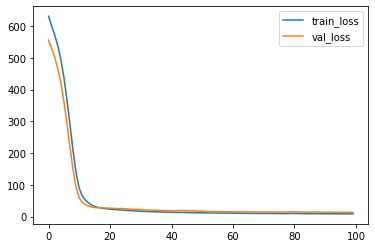

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

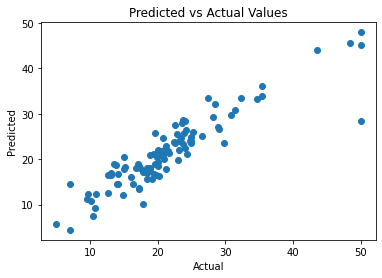

In [47]:
# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()